# Book Analysis

### Dataset Creation

In [119]:
import pandas as pd

In [120]:
df_books_movies = pd.read_csv('../data/final_dataset.csv')
df_books_movies.drop(columns=['Unnamed: 0'], inplace=True)
df_books_movies.dropna(subset = ['revenue', 'budget'], inplace=True)
df_books_movies = df_books_movies[df_books_movies['revenue']!=0]
df_books_movies = df_books_movies[df_books_movies['budget']!=0]

print(len(df_books_movies))
df_books_movies.head()
df_books_movies.rename(columns={'movie_name': 'title'}, inplace=True)
print(df_books_movies.columns)


659
Index(['movie_id', 'movie_cluster', 'title', 'release_date', 'runtime_x',
       'language', 'country', 'genres', 'movie_year', 'index', 'id',
       'BookTitle', 'BookYear', 'Author', 'full name', 'tmdb_id',
       'id_goodreads', 'imdbid', 'runtime_y', 'revenue', 'budget', 'rb_ratio',
       'book_id', 'normalized_rating_x', 'standardized_rating_x',
       'normalized_rating_y', 'standardized_rating_y', 'length',
       'review_count'],
      dtype='object')


In [121]:
from utils.regression_utils import adjust_for_inflation

books_movies_adj = adjust_for_inflation(df_books_movies, ['budget', 'revenue'], is_plotting_enabled=True)
books_movies_adj.head()

,movie_id,movie_cluster,title,release_date,runtime_x,language,country,genres,movie_year,index,...,rb_ratio,book_id,normalized_rating_x,standardized_rating_x,normalized_rating_y,standardized_rating_y,length,review_count,adjusted_budget,adjusted_revenue
0,77856,/m/0kcn7,Mary Poppins,1964-08-27,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,1279,...,17.180397,152380.0,0.802817,1.263138,0.680000,0.676011,209.0,4387.0,4.506424e+07,7.742215e+08
1,196176,/m/01bwgr,Straw Dogs,1971-11-03,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama""}",1971,1759,...,1.478088,10051695.0,0.760563,0.966398,0.476667,-1.444329,192.0,54.0,1.265706e+07,1.870826e+07
2,6703617,/m/0gj6pd,The Forbidden Kingdom,2008-04-04,105.0,"{""/m/0653m"": ""Standard Mandarin"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/08322"": ""Wuxia"", ""/m/0hj3n2k"": ""Fantasy A...",2008,1090,...,2.325575,100237.0,0.633803,0.076178,0.670000,0.571732,306.0,420.0,5.950994e+07,1.383948e+08
3,24416479,/m/07s7_c0,Beastmaster 2: Through the Portal of Time,1991-08-31,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0dz8b"": ""Sword and sorcery"", ""/m/06n90"": ...",1991,213,...,0.144888,7476314.0,0.253521,-2.594481,0.666667,0.536973,0.0,68.0,1.026305e+07,1.486988e+06
4,76345,/m/0k47y,Shaft,1971-06-25,98.0,"{""/m/02h40lc"": ""English Language"", ""/m/0t_2"": ...","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1971,1729,...,3.030404,1227993.0,0.633803,0.076178,0.450000,-1.722406,NaN,25.0,2.301284e+07,6.973822e+07


In [122]:
similarities = pd.read_csv('../data/bookfilm_summaries_with_similarity_and_sentiment.csv')
similarities.columns

merged_df = books_movies_adj.merge(similarities, how = 'left', on= 'movie_id')
merged_df.head()
print(len(books_movies_adj), len(merged_df))
display(merged_df[merged_df.duplicated('movie_id', keep = False)].sort_values('movie_id'))

658 667


,movie_id,movie_cluster,title,release_date,runtime_x,language,country,genres,movie_year,index,...,adjusted_revenue,book_title,movie_name,book_summary,film_summary,similarity,film_sentiment,film_sentiment_score,book_sentiment,book_sentiment_score
63,173944,/m/017gm7,The Lord of the Rings: The Two Towers,2002-12-05,179.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...",2002,1221,...,1.199640e+09,The Lord of the Rings,The Lord of the Rings: The Two Towers,"Long before the events of the novel, the Dark...",Gandalf the Grey gives his life in battle agai...,0.928981,positive,0.993566,positive,0.690898
64,173944,/m/017gm7,The Lord of the Rings: The Two Towers,2002-12-05,179.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...",2002,1221,...,1.199640e+09,The Lord of the Rings,The Lord of the Rings: The Two Towers,The half-Elven maiden Arwen sings the prologu...,Gandalf the Grey gives his life in battle agai...,0.833398,positive,0.993566,positive,0.993525
661,174251,/m/017jd9,The Lord of the Rings: The Return of the King,2003-12-17,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...",2003,1223,...,1.416914e+09,The Lord of the Rings,The Lord of the Rings: The Return of the King,"Long before the events of the novel, the Dark...","Gandalf, Aragorn, Legolas, Gimli, Théoden, Ga...",0.895838,positive,0.892337,positive,0.690898
662,174251,/m/017jd9,The Lord of the Rings: The Return of the King,2003-12-17,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...",2003,1223,...,1.416914e+09,The Lord of the Rings,The Lord of the Rings: The Return of the King,The half-Elven maiden Arwen sings the prologu...,"Gandalf, Aragorn, Legolas, Gimli, Théoden, Ga...",0.808240,positive,0.892337,positive,0.993525
317,675935,/m/03209l,Matilda,1996-07-28,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",1996,1281,...,4.969466e+07,Matilda,Matilda,A young girl named Matilda Wormwood is gifted...,Matilda Wormwood is an extremely intelligent ...,0.888773,positive,0.991200,positive,0.994333
318,675935,/m/03209l,Matilda,1996-07-28,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",1996,1281,...,4.969466e+07,Matilda,Matilda,"Narrating from her deathbed, Matilda tells th...",Matilda Wormwood is an extremely intelligent ...,0.566905,positive,0.991200,positive,0.977258
365,689611,/m/032zq6,What Dreams May Come,1998-09-28,113.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01hmnh"": ""Fantasy"", ""/m/07s9rl0"": ""Drama""...",1998,2148,...,1.021601e+08,What Dreams May Come,What Dreams May Come,The prologue is narrated by a man telling of ...,"While vacationing in Switzerland, physician Ch...",0.761810,positive,0.989950,positive,0.993172
366,689611,/m/032zq6,What Dreams May Come,1998-09-28,113.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01hmnh"": ""Fantasy"", ""/m/07s9rl0"": ""Drama""...",1998,2148,...,1.021601e+08,What Dreams May Come,What Dreams May Come,"While visiting London, John Thunstone hears s...","While vacationing in Switzerland, physician Ch...",0.388557,positive,0.989950,positive,0.998024
415,1335380,/m/04tng0,Exodus,1960-12-15,212.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/082gq"": ""War film"", ""/m/06l3bl"": 

In [123]:
# Group by 'book_id' and 'movie_id', then calculate the mean for 'similarity' and 'book_sentiment_score'
averaged_df = merged_df.groupby(['book_id', 'movie_id'], as_index=False).agg({
    'similarity': 'mean',
    'book_sentiment_score': 'mean',
})

#We have 259 Nan values for the sentiment, what to do with those? drop for now
print(len(averaged_df) - len(averaged_df.dropna(subset= ['similarity'])))

merged_df = merged_df.drop(columns=['similarity', 'book_sentiment_score'])
merged_df.drop_duplicates(subset=['movie_id', 'book_id'], inplace=True)

merged_df = merged_df.merge(averaged_df, how='left', on=['book_id', 'movie_id'])

merged_df.dropna(subset= ['similarity'], inplace = True)
print(len(merged_df))
print(merged_df.columns)

259
399
Index(['movie_id', 'movie_cluster', 'title', 'release_date', 'runtime_x',
       'language', 'country', 'genres', 'movie_year', 'index', 'id',
       'BookTitle', 'BookYear', 'Author', 'full name', 'tmdb_id',
       'id_goodreads', 'imdbid', 'runtime_y', 'revenue', 'budget', 'rb_ratio',
       'book_id', 'normalized_rating_x', 'standardized_rating_x',
       'normalized_rating_y', 'standardized_rating_y', 'length',
       'review_count', 'adjusted_budget', 'adjusted_revenue', 'book_title',
       'movie_name', 'book_summary', 'film_summary', 'film_sentiment',
       'film_sentiment_score', 'book_sentiment', 'similarity',
       'book_sentiment_score'],
      dtype='object')


In [124]:
book_ids = merged_df[['book_id', 'movie_id', 'adjusted_revenue', 'similarity', 'book_sentiment', 'book_sentiment_score']]
book_genres = pd.read_csv('../data/book_genres.csv')
book_genres_df = book_genres.groupby('book_id')['genre'].apply(lambda x: ', '.join(x)).reset_index()
book_genres_df.head()

,book_id,genre
0,1,"Fantasy, Young Adult, Fiction"
1,2,"Fantasy, Young Adult, Fiction"
2,3,"Fantasy, Young Adult, Fiction"
3,5,"Fantasy, Young Adult, Fiction"
4,6,"Fantasy, Young Adult, Fiction, Childrens, Adve..."


In [125]:
book_sim_genres = book_ids.merge(book_genres_df[['book_id', 'genre']], on= 'book_id', how= 'inner')
print(len(book_sim_genres))
book_sim_genres.head()


399


,book_id,movie_id,adjusted_revenue,similarity,book_sentiment,book_sentiment_score,genre
0,10051695.0,196176,1.870826e+07,0.451876,positive,0.994480,"Fiction, Thriller, Horror, Mystery, Crime, Eur..."
1,100237.0,6703617,1.383948e+08,0.559594,positive,0.995404,"Classics, Fiction, Cultural, China, Fantasy, M..."
2,7476314.0,24416479,1.486988e+06,0.344548,positive,0.998812,"Fantasy, Science Fiction, Fiction"
3,6400090.0,22224559,9.522854e+07,0.852735,positive,0.998164,"Romance, Fiction, Young Adult, Contemporary, W..."
4,1058165.0,1231856,6.448907e+07,0.710734,positive,0.997806,"Fiction, Sports, Baseball, Romance, Contemporary"


In [126]:
books_df = pd.read_csv('../data/books.csv')

books_df_final = book_sim_genres.merge(books_df, how = 'left', on='book_id')
print(books_df_final.columns)
print(len(books_df_final))


Index(['book_id', 'movie_id', 'adjusted_revenue', 'similarity',
       'book_sentiment', 'book_sentiment_score', 'genre', 'title', 'year',
       'avg_rating', 'rating_count', 'review_count', 'series', 'series_num',
       'author', 'description', 'length', 'five_stars', 'four_stars',
       'three_stars', 'two_stars', 'one_star', 'cover_image',
       'standardized_rating', 'normalized_rating'],
      dtype='object')
399


In [127]:
books_df_final['part_of_series'] = books_df_final['series'].notna().astype(int)

In [128]:
rating_columns = ['one_star', 'two_stars', 'three_stars', 'four_stars', 'five_stars']
for col in rating_columns:
    percentage_col = col + '_percentage'
    books_df_final[percentage_col] = books_df_final[col] / books_df_final['rating_count']

In [129]:
print(books_df_final[books_df_final.length.isna()])

       book_id  movie_id  adjusted_revenue  similarity book_sentiment  \
70   1514286.0    694405      3.272665e+07    0.762719       positive   
129  6643712.0   4288473      1.222633e+08    0.711245       positive   
130   914235.0   3598984      9.837351e+07    0.751509       positive   
134  2696061.0   1766226      4.802860e+06    0.646759       positive   
146   395371.0   1765026      2.063068e+08    0.780808       positive   
214   442348.0     74984      7.119232e+07    0.695257       positive   
304   861099.0  27485441      5.983656e+07    0.590830       positive   

     book_sentiment_score                                              genre  \
70               0.995824  Fiction, Classics, Historical, Magical Realism...   
129              0.997726                           Science Fiction, Fiction   
130              0.993937  Fiction, Thriller, Mystery, Cultural, Africa, ...   
134              0.203456                                           Classics   
146            

In [130]:
books_df_final.dropna(subset = ['length'], inplace=True)

In [131]:
books_df_final.columns

Index(['book_id', 'movie_id', 'adjusted_revenue', 'similarity',
       'book_sentiment', 'book_sentiment_score', 'genre', 'title', 'year',
       'avg_rating', 'rating_count', 'review_count', 'series', 'series_num',
       'author', 'description', 'length', 'five_stars', 'four_stars',
       'three_stars', 'two_stars', 'one_star', 'cover_image',
       'standardized_rating', 'normalized_rating', 'part_of_series',
       'one_star_percentage', 'two_stars_percentage', 'three_stars_percentage',
       'four_stars_percentage', 'five_stars_percentage'],
      dtype='object')

In [132]:
from utils.regression_utils import multi_one_hot_encode_columns

# how to keep information about the autor? We will take out the series_num because many nan, might change later
books_df_final.drop(columns=['movie_id', 'book_id', 'title', 'series', 'series_num', 'author', 'description', 'cover_image'], inplace=True)
books_df_final.columns
books_regression = multi_one_hot_encode_columns(
    books_df_final,
    column_names_mohe=['genre'], 
    column_names_ohe=['book_sentiment'],
    threshold=50
)


In [161]:
books_regression.to_csv('books_regression.csv')

### Regression

In [134]:
from utils.regression_utils import create_train_test_split

X_train, X_test, y_train, y_test = create_train_test_split(
    books_regression, 
    target_column='adjusted_revenue', 
    should_split_based_on_book=False, 
    test_size=0.2, 
    seed=42
)['all']

In [135]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

model = sm.OLS(y_train, X_train)
results = model.fit()


y_pred = results.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print("RMSE value:", rmse)

results.summary()

RMSE value: 781575923.7048429


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     5.857
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.49e-16
Time:                        14:41:15   Log-Likelihood:                -6483.4
No. Observations:                 313   AIC:                         1.303e+04
Df Residuals:                     283   BIC:                         1.314e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.942e+08   1.96e+07      9.896      0.000    1.56e+08    2.33e+08
similarity               3.193e+07   1.73e+07      1.849      0.065   -2.06e+06    6.59e+07
book_sentiment_score     1.008e+07   1.83e+07      0.550      0.583    -2.6e+07    4.62e+07
year                     5.887e+06   6.36e+06      0.926      0.355   -6.62e+06    1.84e+07
avg_rating              -7.787e+08    4.8e+08     -1.622      0.106   -1.72e+09    1.66e+08
rating_count             6.298e+07   1.36e+07      4.633      0.000    3.62e+07    8.97e+07
review_count            -1.472e+08   5.93e+07     -2.483      0.014   -2.64e+08   -3.05e+07
length                  -4.768e+04   1.81e+07     -0.003      0.998   -3.57e+07    3.56e+07
five_stars               9.448e+07   5.32e+07      1.775      0.077   -1.03e+07    1.99e+08
four_stars               1.296e+08   1.42e+08      0.915      0.361   -1.49e+08    4.08e+08
three_stars             -2.725e+08   1.73e+08     -1.578      0.116   -6.12e+08    6.73e+07
two_stars                2.607e+08   1.35e+08      1.935      0.054   -4.54e+06    5.26e+08
one_star                -9.605e+07   4.91e+07     -1.956      0.051   -1.93e+08    6.05e+05
standardized_rating     -7.787e+08    4.8e+08     -1.622      0.106   -1.72e+09    1.66e+08
normalized_rating       -7.787e+08    4.8e+08     -1.622      0.106   -1.72e+09    1.66e+08
part_of_series           4.936e+07   1.53e+07      3.229      0.001    1.93e+07    7.94e+07
one_star_percentage     -4.809e+08   2.78e+08     -1.731      0.084   -1.03e+09    6.58e+07
two_stars_percentage    -5.427e+08   3.65e+08     -1.489      0.138   -1.26e+09    1.75e+08
three_stars_percentage  -7.992e+08   4.76e+08     -1.678      0.094   -1.74e+09    1.38e+08
four_stars_percentage   -1.056e+08   6.89e+07     -1.533      0.126   -2.41e+08       3e+07
five_stars_percentage    7.906e+08   4.78e+08      1.653      0.099   -1.51e+08    1.73e+09
book_sentiment_positive -5.367e+06   1.23e+07     -0.435      0.664   -2.96e+07    1.89e+07
genre_count              -1.83e+07   2.26e+07     -0.811      0.418   -6.27e+07    2.61e+07
genre_Adventure          6.379e+07   1.71e+07      3.723      0.000    3.01e+07    9.75e+07
genre_Classics           2.487e+07   1.92e+07      1.299      0.195   -1.28e+07    6.26e+07
genre_Crime             -4.579e+07   2.45e+07     -1.870      0.063    -9.4e+07    2.42e+06
genre_Fantasy            2.712e+07   1.87e+07      1.451      0.148   -9.68e+06    6.39e+07
genre_Fiction           -1.498e+07   2.45e+07     -0.612      0.541   -6.32e+07    3.32e+07
genre_Historical        -2.448e+07    1.8e+07     -1.361      0.175   -5.99e+07    1.09e+07
genre_Horror             2.548e+07   1.67e+07      1.526      0.128    -7.4e+06    5.84e+07
genre_Literature        -1.458e+07   2.22e+07  

### Random Forest

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

In [137]:
param_grid = {

    'n_estimators': [100, 150, 200, 300],

    'max_depth': [5, 10, 15, 20, 30],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4],
 
    'bootstrap': [True]

}

model = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
best_params = grid_search.best_params_
print('Best parameters:', best_params)

Best parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [143]:
param_grid = {

    'n_estimators': [2,5, 10,25],

    'max_depth': [15],

    'min_samples_split': [5, 10],

    'min_samples_leaf': [6, 8],
 
    'bootstrap': [True]

}

model = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
best_params = grid_search.best_params_
print('Best parameters:', best_params)

Best parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 10}


In [169]:
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train.ravel())

predictions = best_model.predict(X_test)

rmse = mean_squared_error(y_test, predictions)
print('Validation error (RMSE):', rmse)
r2 = r2_score(y_test, predictions)
print('R^2 Score:', r2)

Validation error (RMSE): 5.4632348853192915e+17
R^2 Score: 0.14235674802688258


,Feature,Importance
20,five_stars_percentage,0.244457
23,genre_Adventure,0.112104
1,similarity,0.094918
18,three_stars_percentage,0.090375
14,normalized_rating,0.056337
33,genre_Thriller,0.053464
4,avg_rating,0.043003
3,year,0.042873
7,length,0.041474
17,two_stars_percentage,0.036334


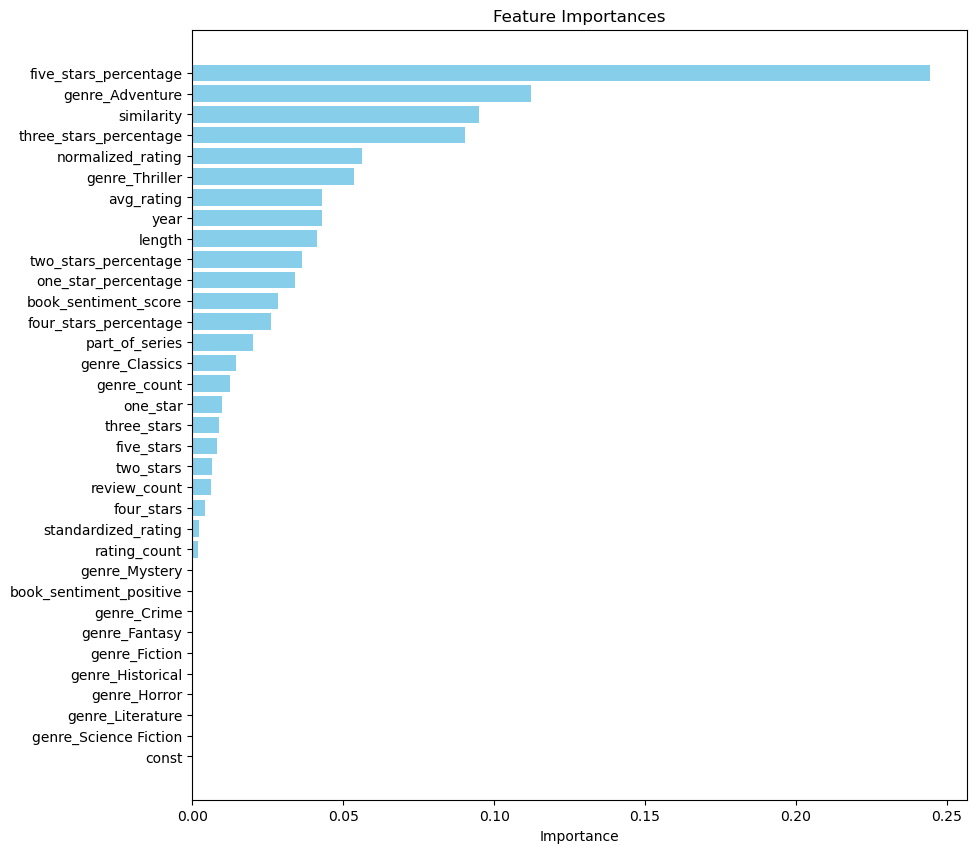

In [146]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

display(feature_importances)

plt.figure(figsize=(10, 10))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [151]:
coefficients = results.params
p_values = results.pvalues
coeff_df = pd.DataFrame({
    'Coefficient': coefficients,
    'P-Value': p_values
})
coeff_df['Feature'] = coeff_df.index
# Display the DataFrame
display(coeff_df)

,Coefficient,P-Value,Feature
const,1.941787e+08,5.064673e-20,const
similarity,3.193089e+07,6.545370e-02,similarity
book_sentiment_score,1.008149e+07,5.826999e-01,book_sentiment_score
year,5.887302e+06,3.550369e-01,year
avg_rating,-7.786696e+08,1.058730e-01,avg_rating
rating_count,6.297588e+07,5.504885e-06,rating_count
review_count,-1.471692e+08,1.362099e-02,review_count
length,-4.768427e+04,9.978999e-01,length
five_stars,9.447569e+07,7.703253e-02,five_stars
four_stars,1.295945e+08,3.608234e-01,four_stars


In [152]:
combined_features = feature_importances.merge(coeff_df, on = 'Feature', how='inner')

In [153]:
display(combined_features)

,Feature,Importance,Coefficient,P-Value
0,five_stars_percentage,0.244457,7.905838e+08,9.948445e-02
1,genre_Adventure,0.112104,6.379341e+07,2.372959e-04
2,similarity,0.094918,3.193089e+07,6.545370e-02
3,three_stars_percentage,0.090375,-7.991951e+08,9.449003e-02
4,normalized_rating,0.056337,-7.786696e+08,1.058730e-01
5,genre_Thriller,0.053464,5.456111e+07,9.399624e-03
6,avg_rating,0.043003,-7.786696e+08,1.058730e-01
7,year,0.042873,5.887302e+06,3.550369e-01
8,length,0.041474,-4.768427e+04,9.978999e-01
9,two_stars_percentage,0.036334,-5.427258e+08,1.376732e-01


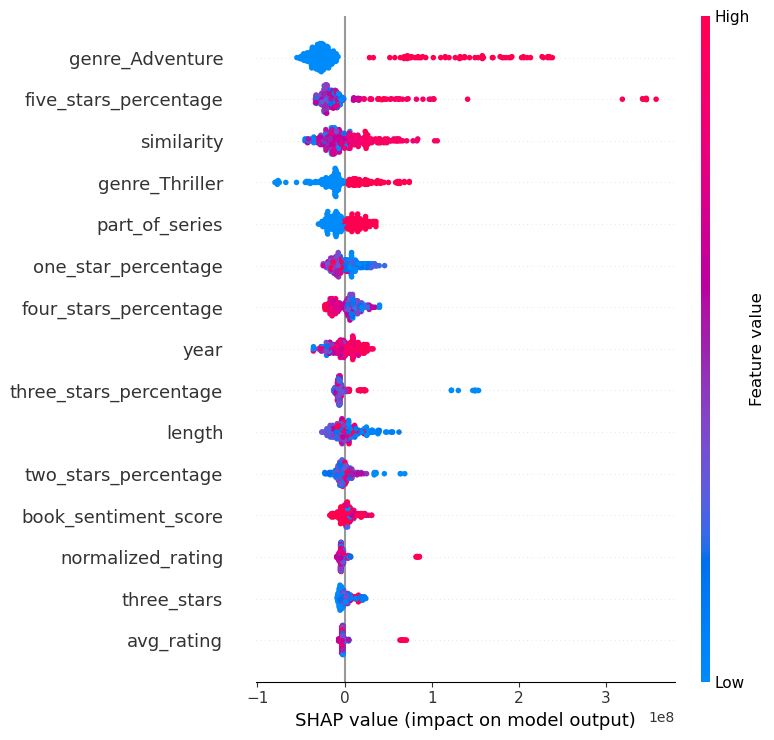

In [174]:
import shap

# Assuming you have a trained Random Forest model `rf_model` and your data is `X_train`
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, max_display=15)